## Day 19

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("Sensitivity_Soil_Nutrient.csv")
df.head()

,SampleID,site,block,paddock,plot,slope,rainfall_reduction,grazing_treatment,year,type,faith_pd
0,GMDR-FK-2018-4,FK,1,1,4,4,0,stable,2018,bacteria,3.912.908.739
1,GMDR-TB-2018-45,TB,3,2,45,2,50,heavy,2018,bacteria,3.298.556.468
2,GMDR-TB-2018-8,TB,1,3,8,1,75,destock,2018,bacteria,3.332.257.877
3,GMDR-TB-2018-31,TB,2,3,31,4,99,destock,2018,bacteria,3.806.342.641
4,GMDR-TB-2018-23,TB,2,2,23,6,0,heavy,2018,bacteria,4.135.953.774


In [8]:
df.shape

(1006, 11)

In [9]:
df.columns

Index(['SampleID', 'site', 'block', 'paddock', 'plot', 'slope',
       'rainfall_reduction', 'grazing_treatment', 'year', 'type', 'faith_pd'],
      dtype='object')

In [26]:
df = df.drop(columns=["SampleID"])

In [29]:
X = df.drop("faith_pd", axis=1)
y = df["faith_pd"]

X = pd.get_dummies(X, drop_first=True)

In [12]:
df["faith_pd"].dtype

dtype('float64')

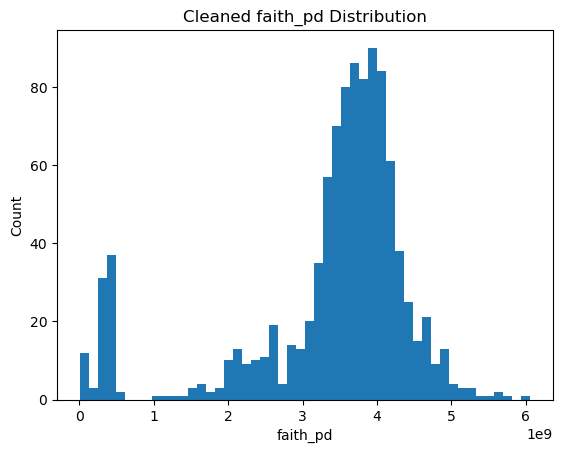

In [18]:
import matplotlib.pyplot as plt

plt.hist(df["faith_pd"], bins=50)
plt.title("Cleaned faith_pd Distribution")
plt.xlabel("faith_pd")
plt.ylabel("Count")
plt.show()

In [19]:
import numpy as np

y = np.log1p(df["faith_pd"])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

In [34]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2

(np.float64(1105317771.0168748), 0.09570596679869725)